# Multiple sounds & conversion into spectrograms

In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [147]:
import librosa
from librosa.feature import melspectrogram, mfcc

In [2]:
from scipy.io.wavfile import read

In [3]:
from audio_utils import *

In [4]:
import pandas as pd
import os
from pathlib import Path
from skimage.transform import resize
from skimage.io import imread

In [5]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import accuracy_score

In [30]:
from glob import glob

In [121]:
def get_spectrogram_temp(filename: str, sampling_rate: int = 44100):
    x, _ = librosa.load(filename, sr=sampling_rate)
    x_freq = librosa.stft(x)
    xdb = librosa.amplitude_to_db(abs(x_freq))
    return xdb

In [138]:
def get_mel_spectoogram(filename: str, sampling_rate: int = 44100):
    x, s_rate = librosa.load(filename, sr=sampling_rate)
    return melspectrogram(y=x, sr=s_rate, n_mels=128, n_fft=1024, hop_length=512)

In [148]:
def get_mfcc(filename: str, sampling_rate: int = 44100, number_of_mfcc: int = 40):
    data, s_rate = librosa.load(filename, sr=sampling_rate)
    return mfcc(y=data, sr=s_rate, n_mfcc=number_of_mfcc)

In [23]:
Categories=['Cough', 'Sneeze']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='data/input/' 

In [139]:
mel_array = []
spectrogram_array = []
target_array = []
for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for sound in os.listdir(os.path.join(datadir,i)):
        if sound.endswith('.wav'):
            mel_array.append(get_mel_spectoogram(os.path.join(path, sound)))
            spectrogram_array.append(get_spectrogram_temp(os.path.join(path, sound)))
            # spectrogram_array.append(get_spectrogram(os.path.join(path, sound)))
            target_array.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : Cough
loaded category:Cough successfully
loading... category : Sneeze
loaded category:Sneeze successfully


In [ ]:
# spectrogram_array = []
# target_array = []
# for i in Categories:
#     print(f'loading... category : {i}')
#     path = os.path.join(datadir, i)
#     spectrogram_array = [get_spectrogram(os.path.join(path, sound)) for sound in path if sound.endswith('.wav')]
#     target_array = [Categories.index(i) for sound in path if sound.endswith('.wav')]
#     print(f'loaded category:{i} successfully')

In [140]:
mel_array[0].shape

(128, 44)

In [141]:
mel_array[1].shape

(128, 28)

In [152]:
mfcc1 = get_mfcc(os.path.join(datadir, 'Cough', 'cough_0021_1.wav'))
mfcc2 = get_mfcc(os.path.join(datadir, 'Sneeze', 'sneeze_0002_2.wav'))

In [153]:
mfcc1.shape

(40, 32)

In [154]:
mfcc2.shape

(40, 70)

In [125]:
spectrogram_array[0].shape

(1025, 44)

In [126]:
spectrogram_array[1].shape

(1025, 28)

In [127]:
spectrogram_array[-1].shape

(1025, 79)

In [128]:
type(spectrogram_array[0])

numpy.ndarray

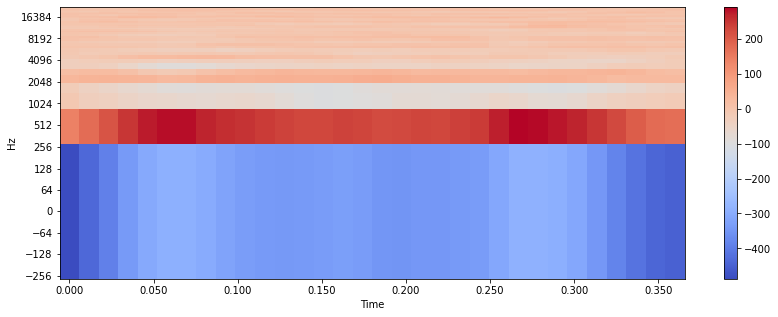

In [157]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc1, sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

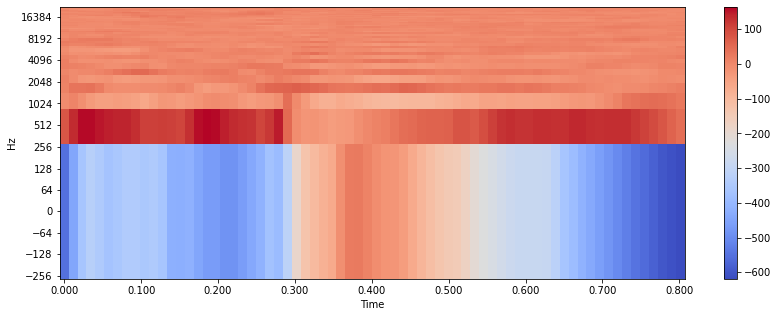

In [156]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc2, sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

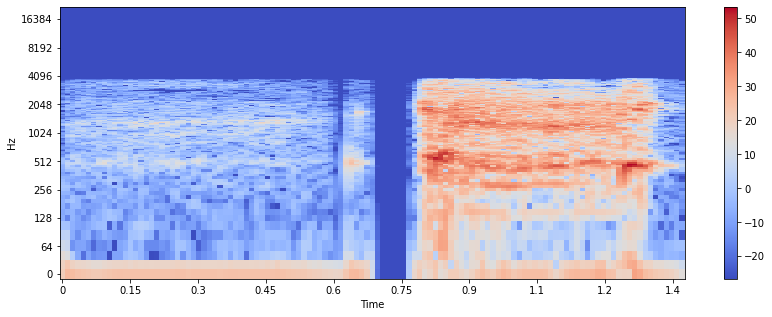

In [131]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(spectrogram_array[7], sr=44100, x_axis='time', y_axis='log')
plt.colorbar()

In [94]:
flat_data=np.array(np.array(spectrogram_array, dtype=object), dtype=object)
target=np.array(target_array, dtype=int)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

In [95]:
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [96]:
len(spectrogram_array)

126

In [97]:
spectrogram_array[0].shape

(45100,)

## Classification part

In [98]:
param_grid={'C':[0.1, 1, 10, 100],'gamma':[0.0001, 0.001, 0.1, 1],'kernel':['rbf', 'poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc, param_grid)

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [101]:
x_train

,0
9,"[1.1281592, 6.136322, 7.0160856, 7.101551, 6.6..."
22,"[-35.845715, -17.566061, -13.2036705, -23.2818..."
120,"[-19.461779, -21.443758, -27.422335, -23.91178..."
69,"[12.240194, 18.01136, 19.31721, 20.909, 21.411..."
68,"[-14.342455, -8.565729, -12.970538, -25.406227..."
...,...
65,"[17.721529, 22.56186, 22.37604, 21.580647, 21...."
123,"[-16.261465, -15.7536125, -16.852417, -15.1012..."
66,"[8.45232, 14.752851, 12.663684, 0.3858352, 7.9..."
34,"[9.019355, 14.61367, 15.471954, 15.053389, 15...."


In [100]:
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

/Users/kieron/PythonProjects/Z-Works/SoundRecognition/sound_classifier/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
TypeError: only size-1 arrays can be converted to Python scalars

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/kieron/PythonProjects/Z-Works/SoundRecognition/sound_classifier/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kieron/PythonProjects/Z-Works/Soun

ValueError: setting an array element with a sequence.

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(f"The model is {accuracy_score(y_pred, y_test) * 100}% accurate")